In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum() # Check for duplicate rows

np.int64(0)

In [6]:
data.isnull().sum() # Check for missing values

id       0
label    0
tweet    0
dtype: int64

## Text Preprocessing

In [7]:
import re
import string

In [8]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

covert upper case to lowe case


In [9]:
data["tweet"] = data["tweet"].apply(lambda x: " " .join(x.lower() for x in x.split()))

In [10]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [11]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

remove links

In [12]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove Puntuation

In [13]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
    

data["tweet"] = data["tweet"].apply(remove_punctuation)

In [14]:
data["tweet"].tail(20)

7900    why did my iphone calendar link with my facebo...
7901    brendanbrady1 the new apple advert can fuck of...
7902    all i wanna do is put music from my itunes on ...
7903    kaylahinks snapchatprobbz haha so true deleted...
7904    fuckyou apple one thing stops working and i ha...
7905    ove a fist inside my  oh god i a fist inside m...
7906    legit feels like i have a brand new phone appl...
7907    tipsy rhymes with e ye we je mi ne donts miss ...
7908    second fucking time stay on hold for 30 mins a...
7909    rt monteithelgort first post from my new phone...
7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helpin

Removed numbers

In [15]:
data["tweet"] = data["tweet"].str.replace(r'\d+', '', regex=True)


In [16]:
data["tweet"].tail(20)

7900    why did my iphone calendar link with my facebo...
7901    brendanbrady the new apple advert can fuck off...
7902    all i wanna do is put music from my itunes on ...
7903    kaylahinks snapchatprobbz haha so true deleted...
7904    fuckyou apple one thing stops working and i ha...
7905    ove a fist inside my  oh god i a fist inside m...
7906    legit feels like i have a brand new phone appl...
7907    tipsy rhymes with e ye we je mi ne donts miss ...
7908    second fucking time stay on hold for  mins and...
7909    rt monteithelgort first post from my new phone...
7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helpin

Removed Stopwords

In [17]:
!pip install nltk


In [18]:
import nltk

In [19]:
nltk.download('stopwords' , download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [21]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [22]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [23]:
data["tweet"].head(10)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
5    iphone software update fucked phone big time s...
6    happy us instapic instadaily us sony xperia xp...
7    new type c charger cable uk … bay amazon etsy ...
8    bout go shopping listening music iphone justme...
9    photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object

### Stemming

In [24]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [25]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join([ps.stem(x) for x in x.split()]))

In [26]:
data["tweet"].head(10)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
5    iphon softwar updat fuck phone big time stupid...
6    happi us instap instadaili us soni xperia xperiaz
7    new type c charger cabl uk … bay amazon etsi n...
8    bout go shop listen music iphon justm music li...
9    photo fun selfi pool water soni camera picofth...
Name: tweet, dtype: object

## Building Vocabulary

In [27]:
from collections import Counter
vocab = Counter()

In [28]:
vocab

Counter()

In [29]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())

In [30]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [31]:
len(vocab)

15949

In [32]:
data.shape

(7920, 3)

In [33]:
tokens = [key for key in vocab if vocab[key] > 10]

In [34]:
len(tokens)

1145

In [35]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding='utf-8')
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide Data Set

In [36]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [37]:
X = data["tweet"]
y = data["label"]

In [38]:
X

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [39]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [40]:
!pip install scikit-learn

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
len(X_train), len(X_test), len(y_train), len(y_test)

(6336, 1584, 6336, 1584)

## Vectorization

In [43]:
def vectorizer(ds, vocab):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocab))

        for i in range(len(vocab)):
            if vocab[i] in sentence.split():
                sentence_lst[i] = 1
        
        vectorized_lst.append(sentence_lst)
    
    vectorized_lst_new = np.array(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new

In [44]:
x_train_vectorized = vectorizer(X_train, tokens)


In [45]:
for i in x_train_vectorized[0]:
    print(i, end=' ')

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

In [46]:
X_test_vectorized = vectorizer(X_test, tokens)

In [47]:
y_train.value_counts()

label
0    4742
1    1594
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x19564baa900>,
 [Text(-0.7816646590045807, -0.7739511359661234, 'Negative'),
  Text(0.7816644068192491, 0.7739513906647572, 'Positive')],
 [Text(-0.42636254127522577, -0.4221551650724309, '74.8%'),
  Text(0.4263624037195904, 0.42215530399895845, '25.2%')])

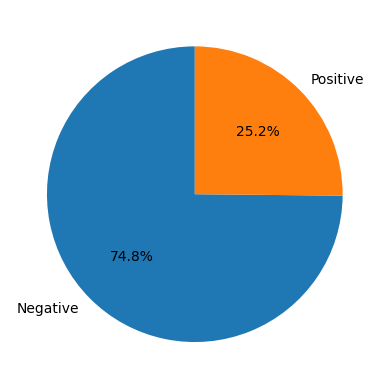

In [48]:
plt.pie(y_train.value_counts(), labels=['Negative', 'Positive'], autopct='%1.1f%%', startangle=90)

In [49]:
!pip install imbalanced-learn

#### This is an imbalanced dataset
##### So we are going to use Synthetic Minority Over Samplying Technique (SMOTE)

In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_vectorized_smote, y_train_smote = smote.fit_resample(x_train_vectorized, y_train)


In [51]:
y_train_smote.value_counts()

label
0    4742
1    4742
Name: count, dtype: int64

## Model Training and Evaluation

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [53]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores: \n\tAccuracy: {acc} \n\tPrecision: {pr} \n\tRecall: {rec} \n\tF1 Score: {f1}')

def testing_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores: \n\tAccuracy: {acc} \n\tPrecision: {pr} \n\tRecall: {rec} \n\tF1 Score: {f1}')

### Logistic Regression


In [54]:
lr = LogisticRegression()
lr.fit(x_train_vectorized_smote, y_train_smote)

y_train_pred = lr.predict(x_train_vectorized_smote)

y_test_pred = lr.predict(X_test_vectorized)

training_scores(y_train_smote, y_train_pred)
testing_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy: 0.94 
	Precision: 0.915 
	Recall: 0.97 
	F1 Score: 0.942
Testing Scores: 
	Accuracy: 0.873 
	Precision: 0.736 
	Recall: 0.833 
	F1 Score: 0.782


### Naive Bayes

In [55]:
nb = MultinomialNB()
nb.fit(x_train_vectorized_smote, y_train_smote)

y_train_pred = nb.predict(x_train_vectorized_smote)
y_test_pred = nb.predict(X_test_vectorized)

training_scores(y_train_smote, y_train_pred)
testing_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy: 0.904 
	Precision: 0.868 
	Recall: 0.953 
	F1 Score: 0.908
Testing Scores: 
	Accuracy: 0.881 
	Precision: 0.721 
	Recall: 0.917 
	F1 Score: 0.807


### Decision Tree

In [56]:
dt = DecisionTreeClassifier()
dt.fit(x_train_vectorized_smote, y_train_smote)

y_train_pred = dt.predict(x_train_vectorized_smote)
y_test_pred = dt.predict(X_test_vectorized)

training_scores(y_train_smote, y_train_pred)
testing_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy: 1.0 
	Precision: 1.0 
	Recall: 0.999 
	F1 Score: 1.0
Testing Scores: 
	Accuracy: 0.839 
	Precision: 0.724 
	Recall: 0.662 
	F1 Score: 0.692


### Random Forest

In [57]:
rf = RandomForestClassifier()
rf.fit(x_train_vectorized_smote, y_train_smote)

y_train_pred = rf.predict(x_train_vectorized_smote)
y_test_pred = rf.predict(X_test_vectorized)

training_scores(y_train_smote, y_train_pred)
testing_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy: 1.0 
	Precision: 1.0 
	Recall: 1.0 
	F1 Score: 1.0
Testing Scores: 
	Accuracy: 0.873 
	Precision: 0.813 
	Recall: 0.694 
	F1 Score: 0.749


### Support Vector Machine

In [58]:
svm = SVC()
svm.fit(x_train_vectorized_smote, y_train_smote)

y_train_pred = svm.predict(x_train_vectorized_smote)
y_test_pred = svm.predict(X_test_vectorized)

training_scores(y_train_smote, y_train_pred)
testing_scores(y_test, y_test_pred)

Training Scores: 
	Accuracy: 0.977 
	Precision: 0.96 
	Recall: 0.996 
	F1 Score: 0.977
Testing Scores: 
	Accuracy: 0.89 
	Precision: 0.795 
	Recall: 0.806 
	F1 Score: 0.8


In [60]:
import pickle

with open('../static/model/logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(lr, file)
    